In [3]:
#Instalando módulo necessária para a análise
!pip install lifelines==0.26.3

In [4]:
#Importando módulos para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [5]:
#Configurações para as plotagens
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [10]:
#Configurações do dataframe

#Removendo limite máximo de colunas para vizualização
pd.options.display.max_columns = None

In [54]:
#Importando o dataset
df = pd.read_csv('Data/CustomerChurn.csv', sep=';')

In [49]:
#Checando se o read_csv ocorreu da maneira correta
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes


<h3>Dataprep</h3><br/><h4>Tratamento dos dados

In [14]:
#Listando todas as colunas
df.columns

Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [55]:
#Renomeando todas as colunas para Português
depara = {
          'Senior Citizen':'Idoso', 
          'Partner':'Possui_parceiro', 
          'Dependents':'Possui_dependentes',
          'Tenure':'Meses_relacionamento',
          'Phone Service':'Possui_telefonia',
          'Multiple Lines':'Multipla_linha_tel',
          'Internet Service':'Provedor_internet',
          'Online Security':'Possui_seguranca_online',
          'Online Backup':'Possui_backup_online',
          'Device Protection':'Possui_seguro_dispositivo',
          'Tech Support':'Usou_suporte_tecnico',
          'Streaming TV':'Assinatura_TV',
          'Streaming Movies':'Assinatura_Filmes',
          'Contract':'Tipo_contrato',
          'Paperless Billing':'Fatura_digital',
          'Payment Method':'Meio_pagamento',
          'Monthly Charges':'Preco_mensal',
          'Total Charges':'Preco_total',
          'Churn':'Churn'
         }
df.rename(columns = depara, inplace = True)

In [56]:
#Binarizando variáveis que serão utilizadas
def dummy_var(col):
    df.loc[df[col] == 'Yes', [col]] = 1
    df.loc[df[col] == 'No', [col]] = 0

dummy_var('Idoso')
dummy_var('Churn')

In [57]:
#Checando volumetria do dataframe
df.shape

(7043, 21)

In [58]:
#Convertendo Texto para numéricos

#Troca , para .
df["Preco_mensal"]=df["Preco_mensal"].str.replace(',','.')
df["Preco_total"]=df["Preco_total"].str.replace(',','.')

#Converte para numérico
df['Preco_mensal']=pd.to_numeric(df['Preco_mensal'])
df['Preco_mensal']=pd.to_numeric(df['Preco_mensal'])

<AxesSubplot:ylabel='Frequency'>

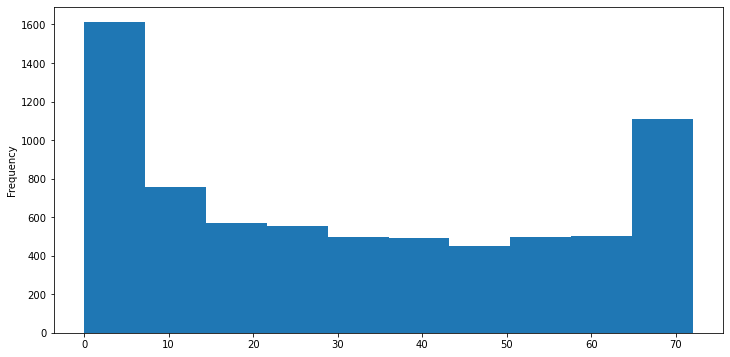

In [69]:
#Histograma do tempo de relacionamento
df['Meses_relacionamento'].plot(kind='hist')